In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
ETH = pd.read_csv("ETH-USD.csv", parse_dates = ['Date'])
BTC = pd.read_csv("BTC-USD.csv", parse_dates = ['Date'])

In [3]:
#set datatime as index
ETH.set_index('Date', inplace=True)
BTC.set_index('Date', inplace=True)

In [4]:
#add three columns which are daily percentage change and 30/90 days moving average
ETH = ETH.assign(pctChange = ETH['Close'].pct_change(1)*100)
ETH = ETH.assign(movingAverage_30days = ETH['Close'].rolling(window=30, min_periods=15).mean())
ETH = ETH.assign(movingAverage_90days = ETH['Close'].rolling(window=90, min_periods=45).mean())

In [113]:
#add three columns which are daily percentage change and 30/90 days moving average
BTC = BTC.assign(pctChange = BTC['Close'].pct_change(1)*100)
BTC = BTC.assign(movingAverage_30days = BTC['Close'].rolling(window=30, min_periods=15).mean())
BTC = BTC.assign(movingAverage_90days = BTC['Close'].rolling(window=90, min_periods=45).mean())

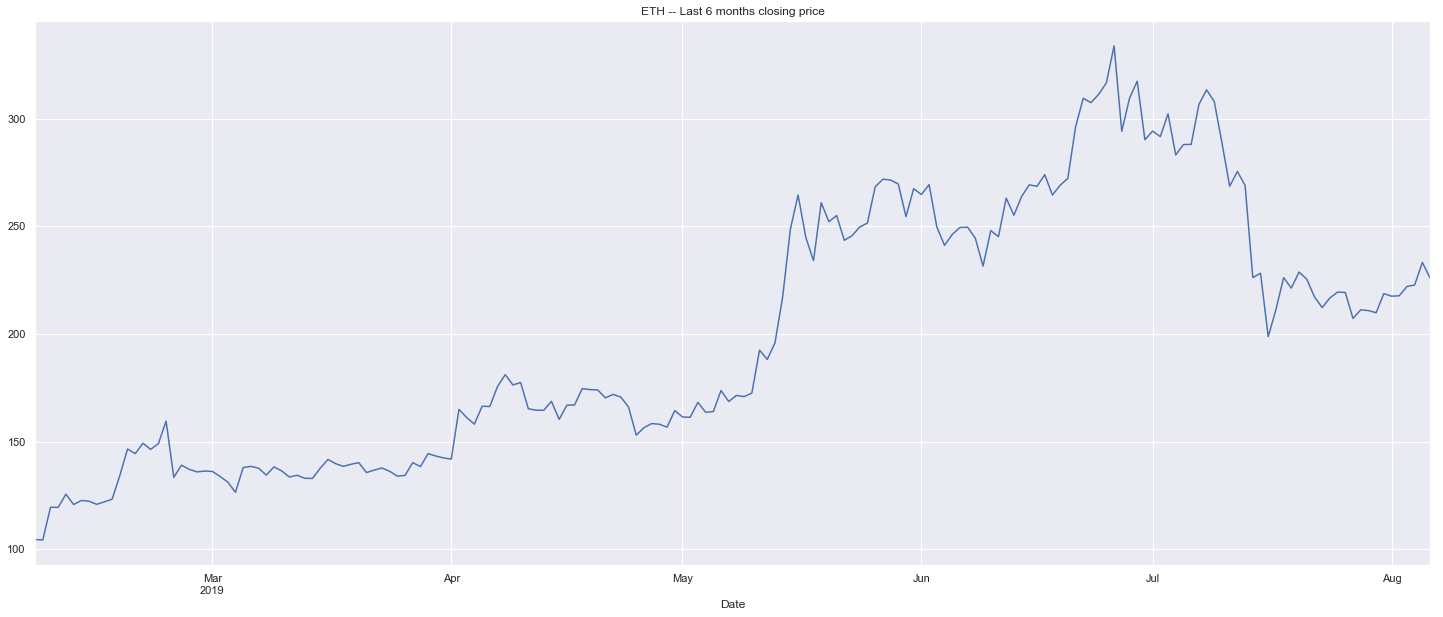

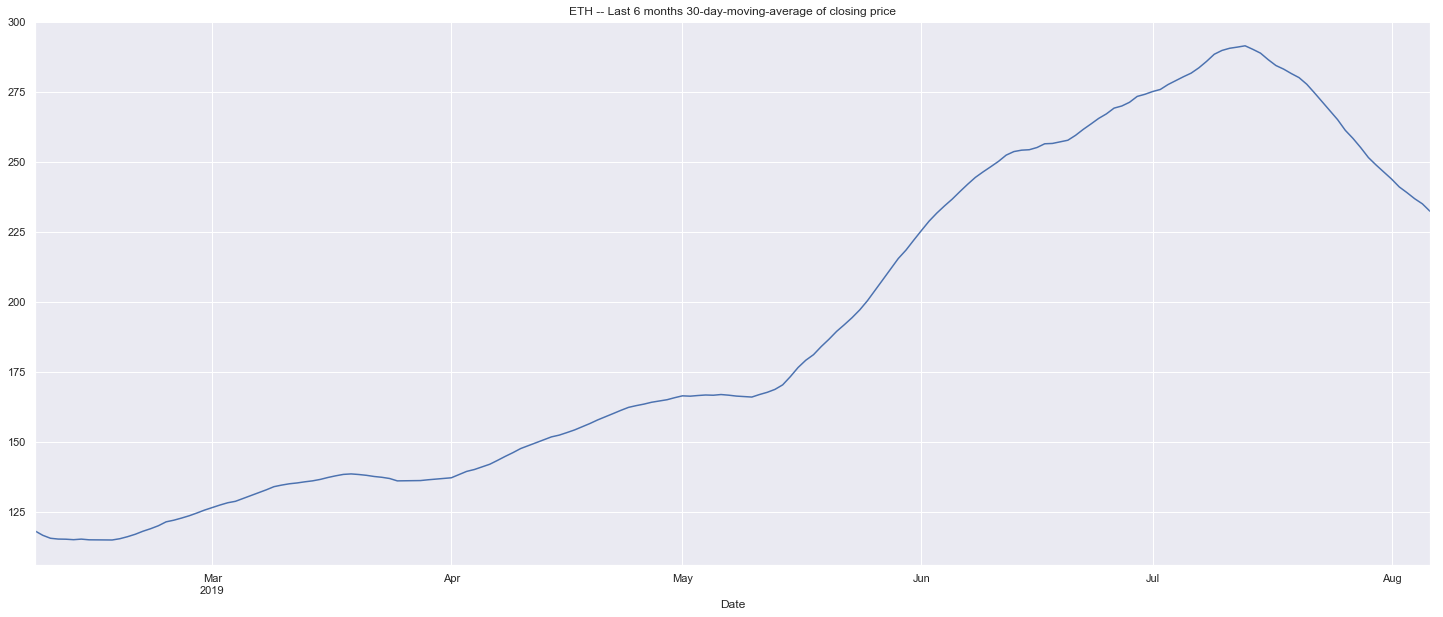

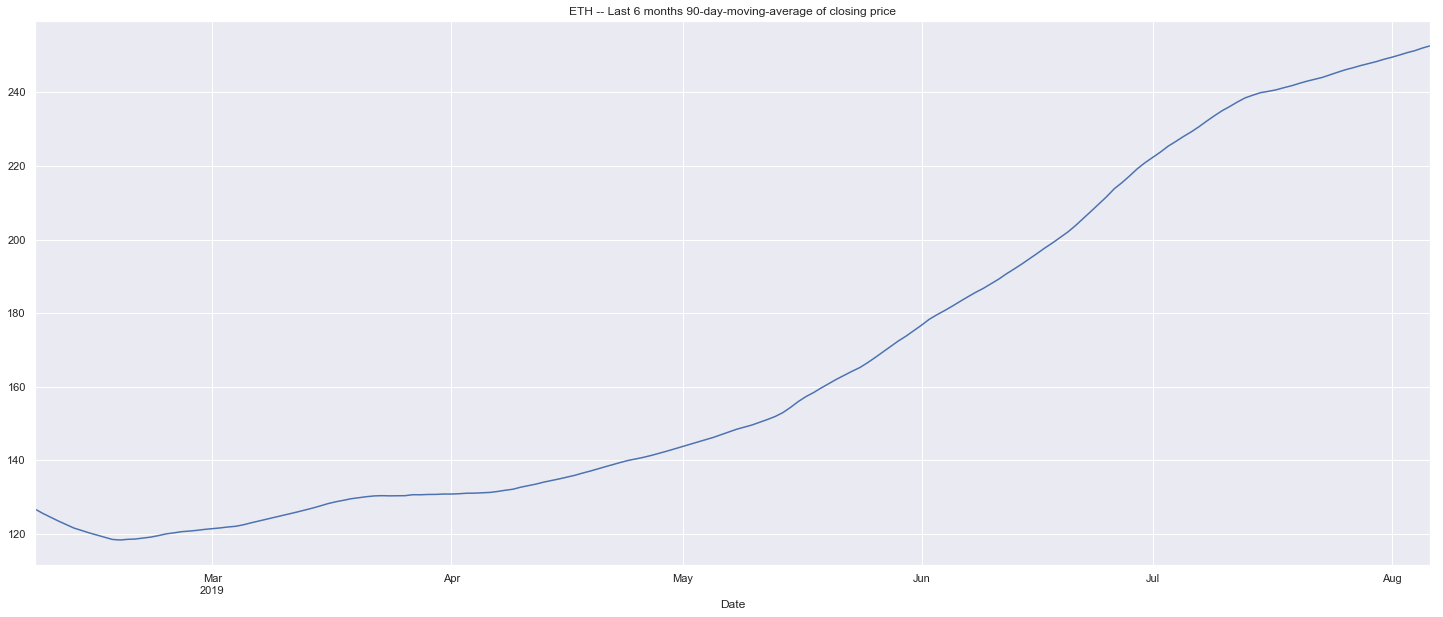

In [114]:
#ETH
#plot recent 6 months of closing price/30days moving average/90days moving average
plt.figure(figsize=[25,10])
ETH['Close'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('ETH -- Last 6 months closing price')
plt.show()

plt.figure(figsize=[25,10])
ETH['movingAverage_30days'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('ETH -- Last 6 months 30-day-moving-average of closing price')
plt.show()

plt.figure(figsize=[25,10])
ETH['movingAverage_90days'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('ETH -- Last 6 months 90-day-moving-average of closing price')
plt.show()

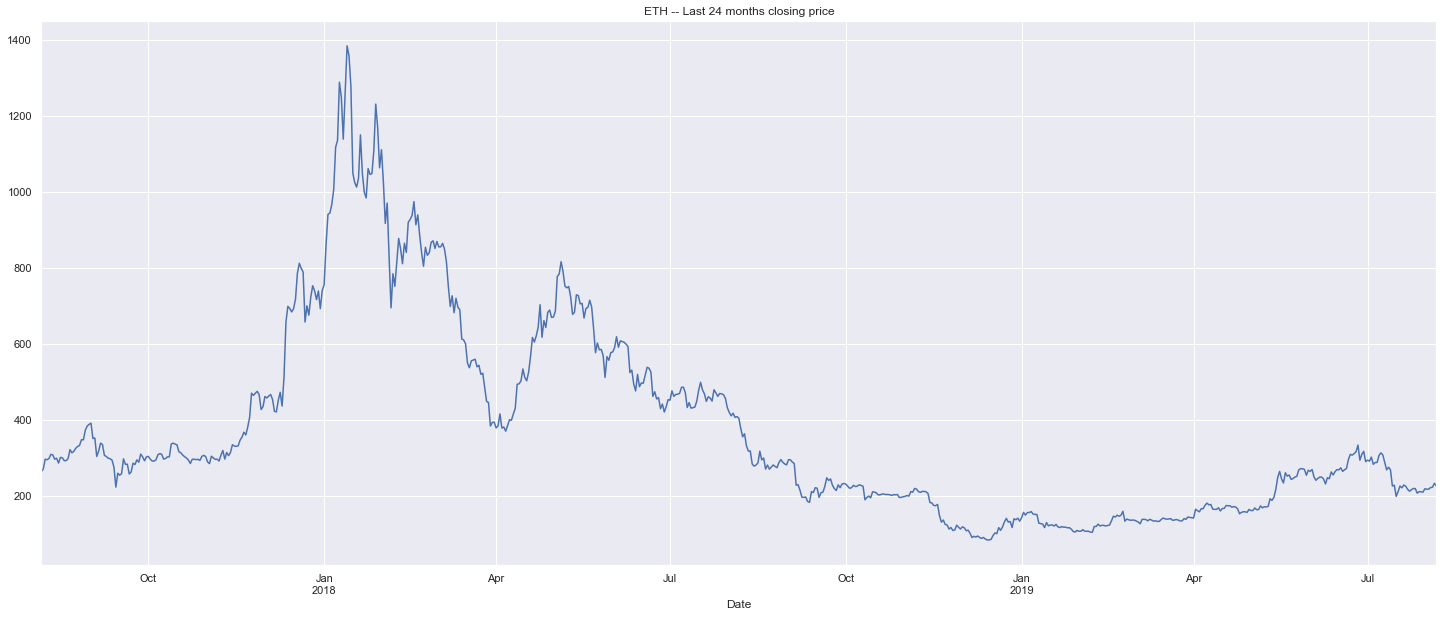

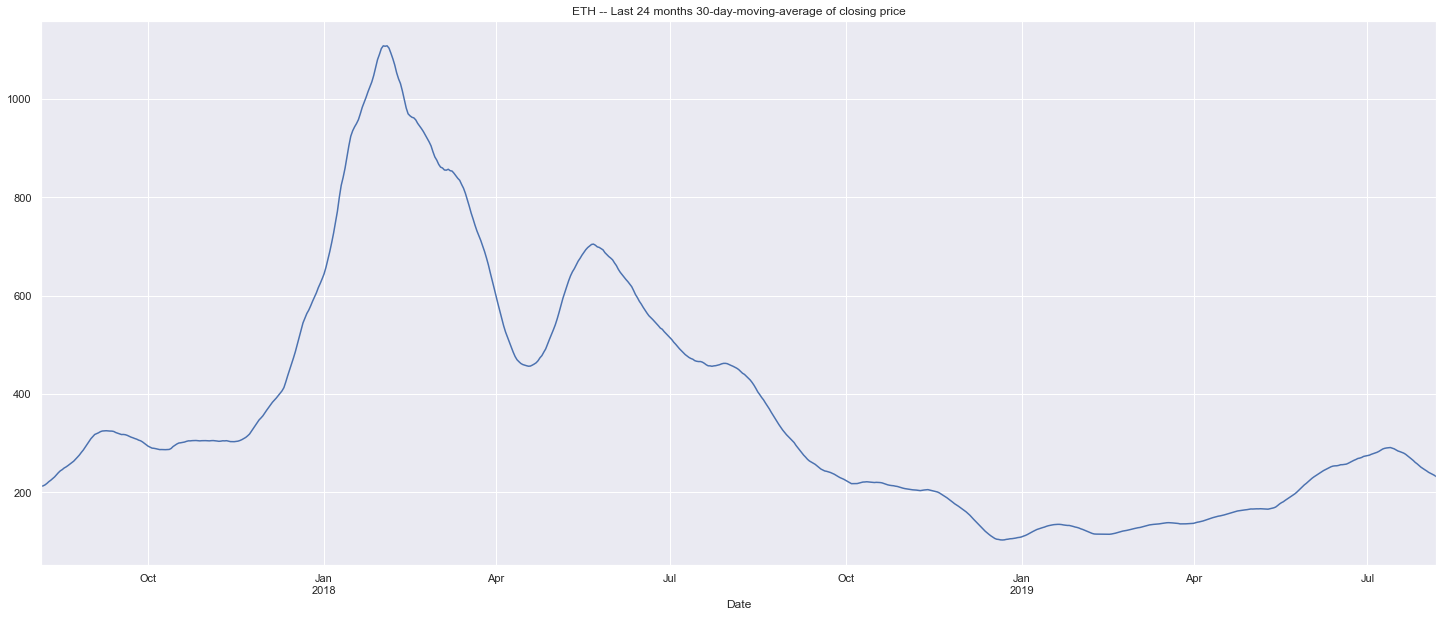

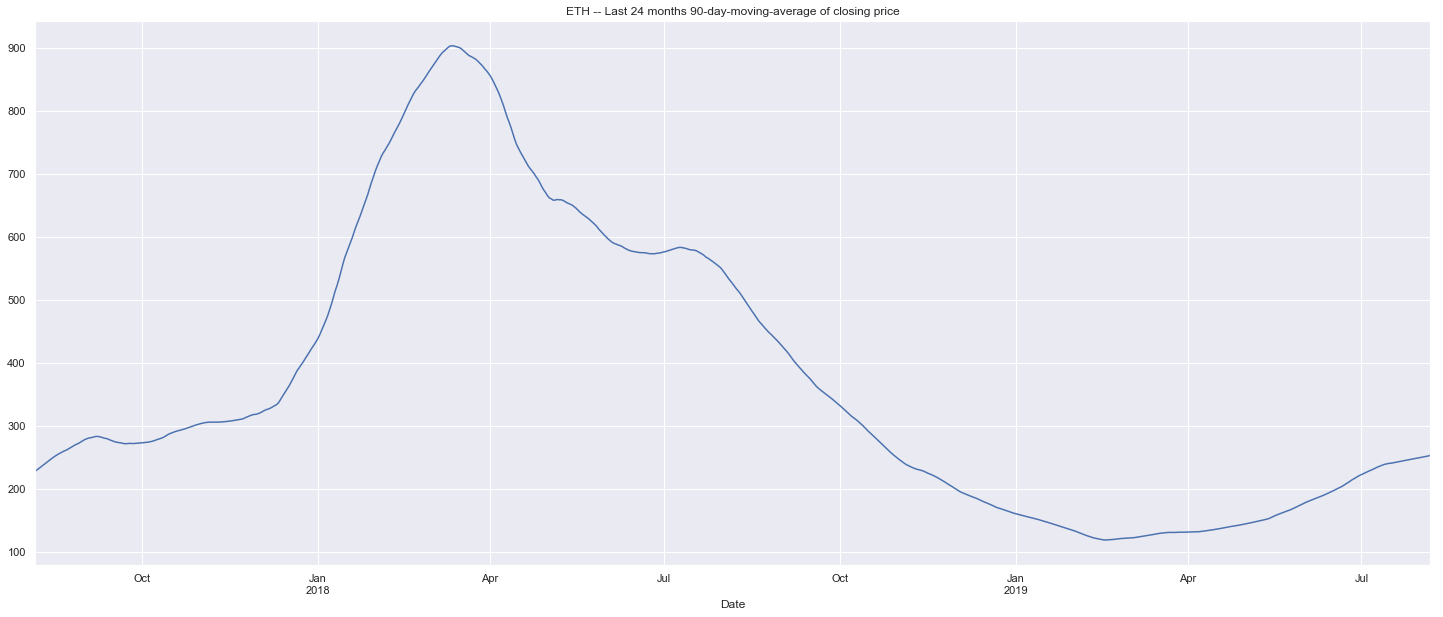

In [115]:
#ETH
#plot recent 24 months of closing price/30days moving average/90days moving average
plt.figure(figsize=[25,10])
ETH['Close'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('ETH -- Last 24 months closing price')
plt.show()

plt.figure(figsize=[25,10])
ETH['movingAverage_30days'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('ETH -- Last 24 months 30-day-moving-average of closing price')
plt.show()

plt.figure(figsize=[25,10])
ETH['movingAverage_90days'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('ETH -- Last 24 months 90-day-moving-average of closing price')
plt.show()

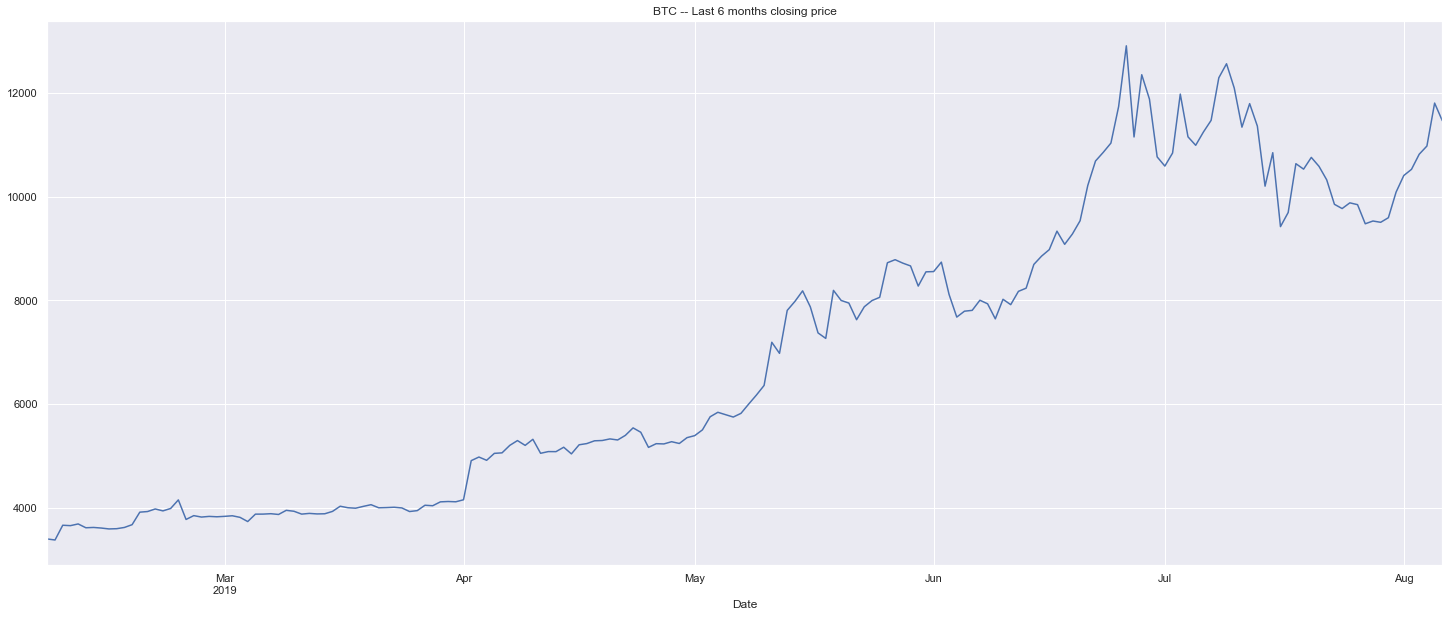

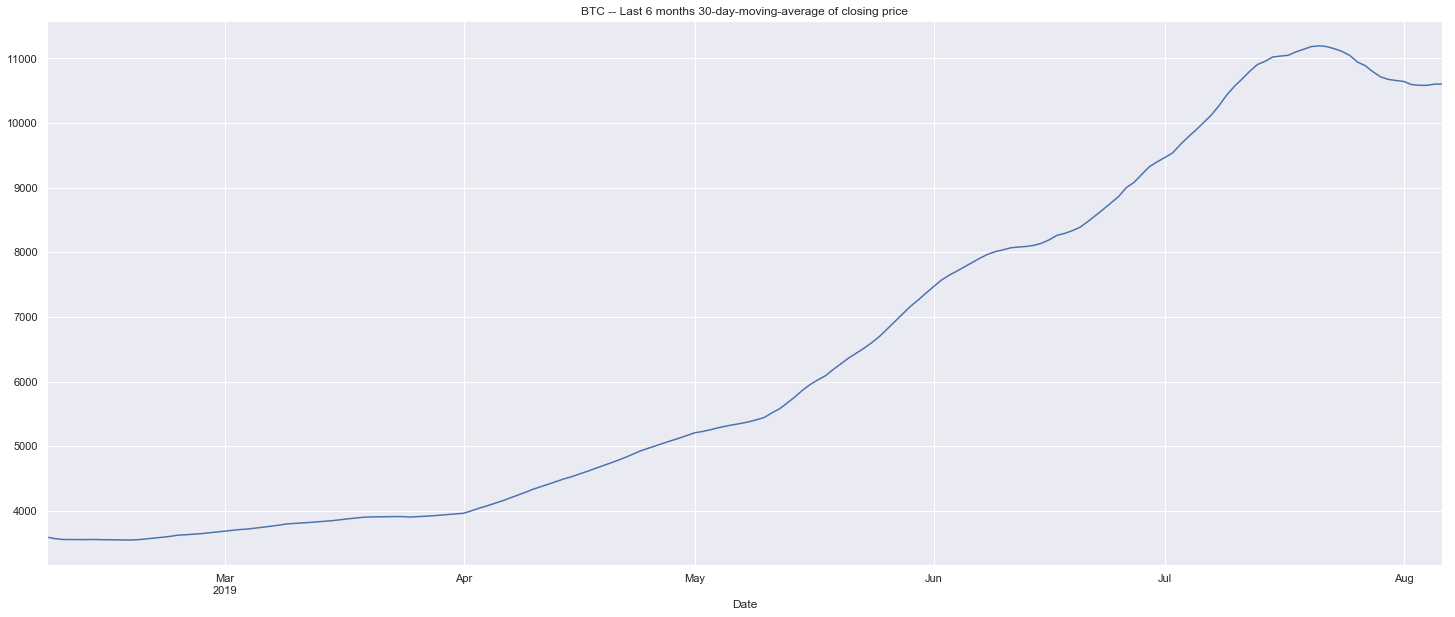

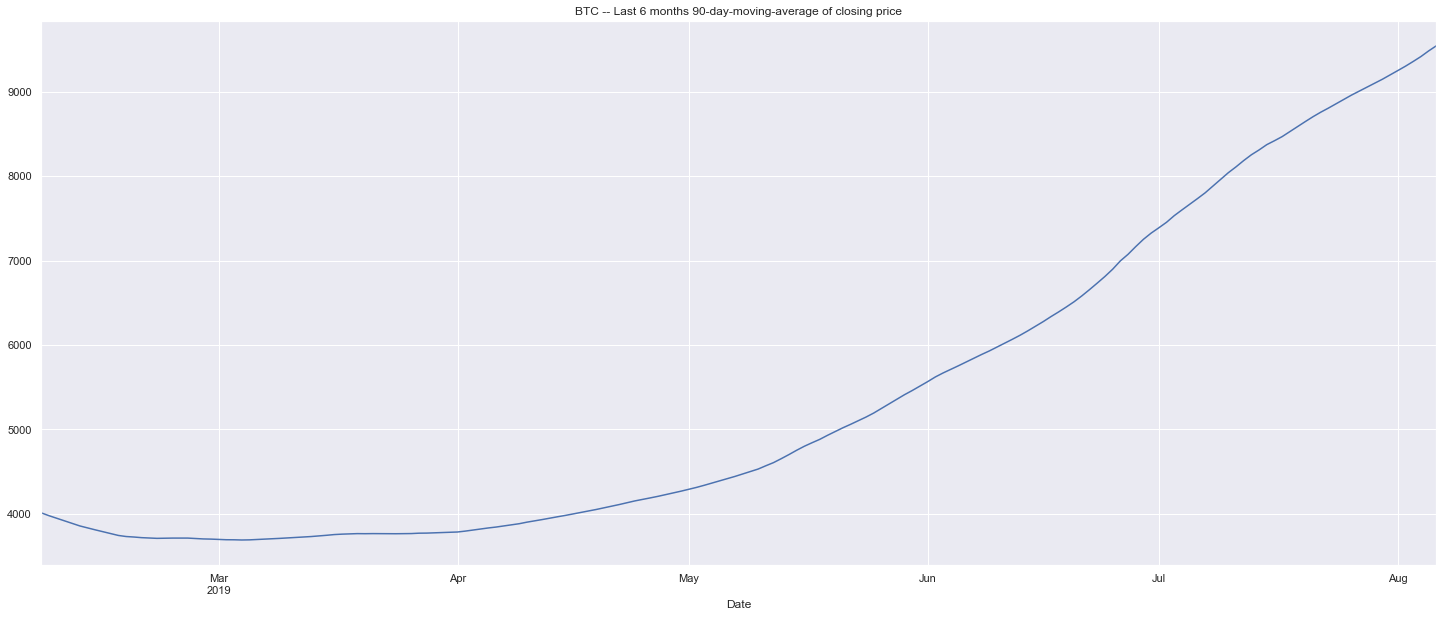

In [116]:
#BTC
#plot recent 6 months of closing price/30days moving average/90days moving average
plt.figure(figsize=[25,10])
BTC['Close'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('BTC -- Last 6 months closing price')
plt.show()

plt.figure(figsize=[25,10])
BTC['movingAverage_30days'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('BTC -- Last 6 months 30-day-moving-average of closing price')
plt.show()

plt.figure(figsize=[25,10])
BTC['movingAverage_90days'].loc['2019-02-06':'2019-08-06'].plot()
plt.title('BTC -- Last 6 months 90-day-moving-average of closing price')
plt.show()

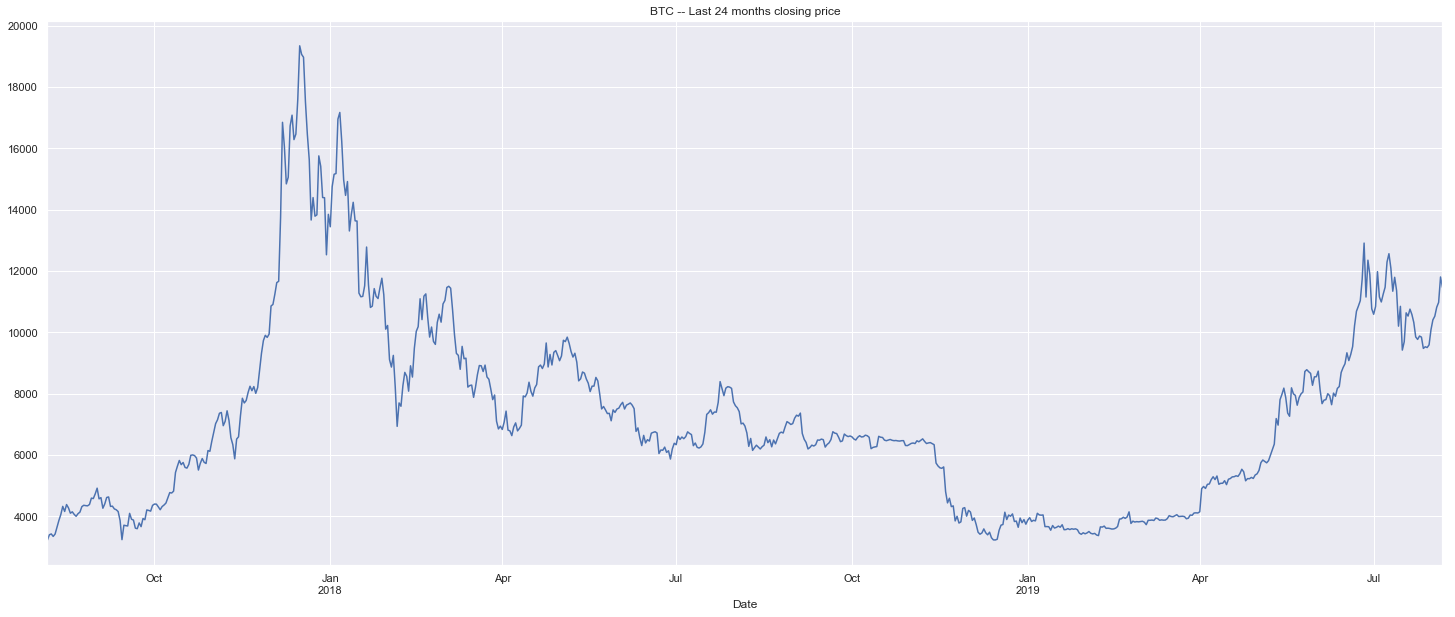

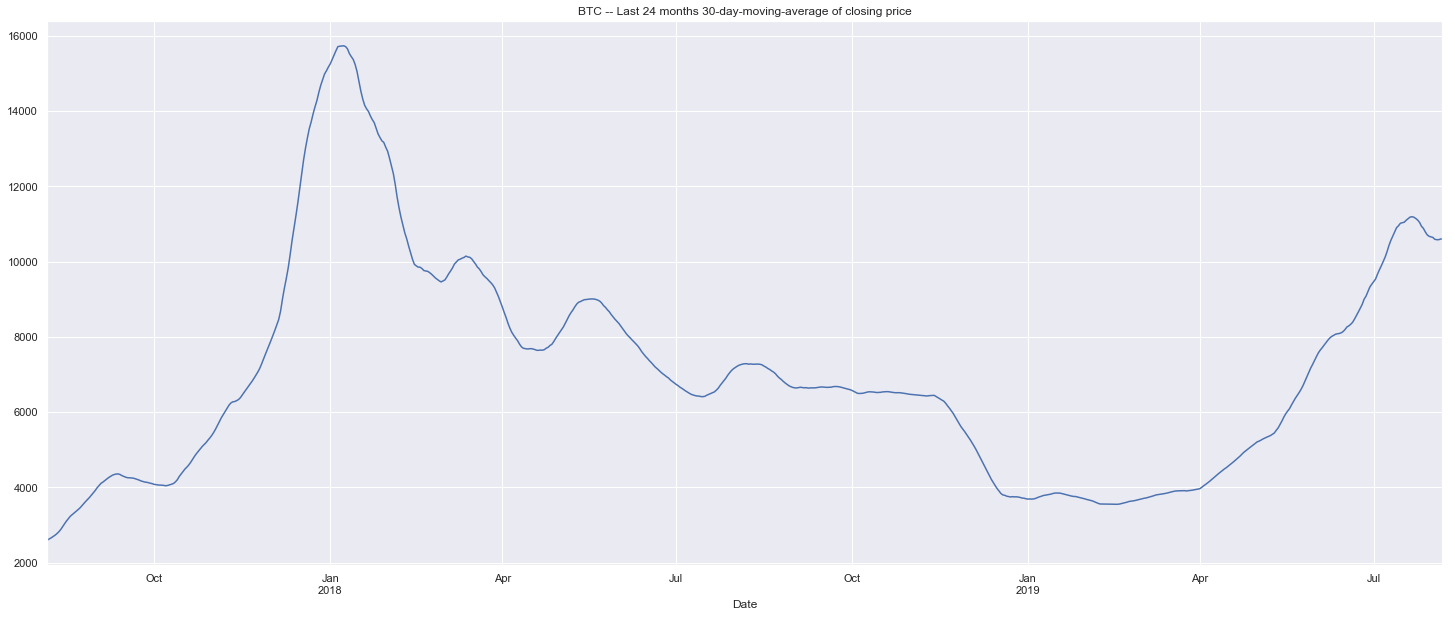

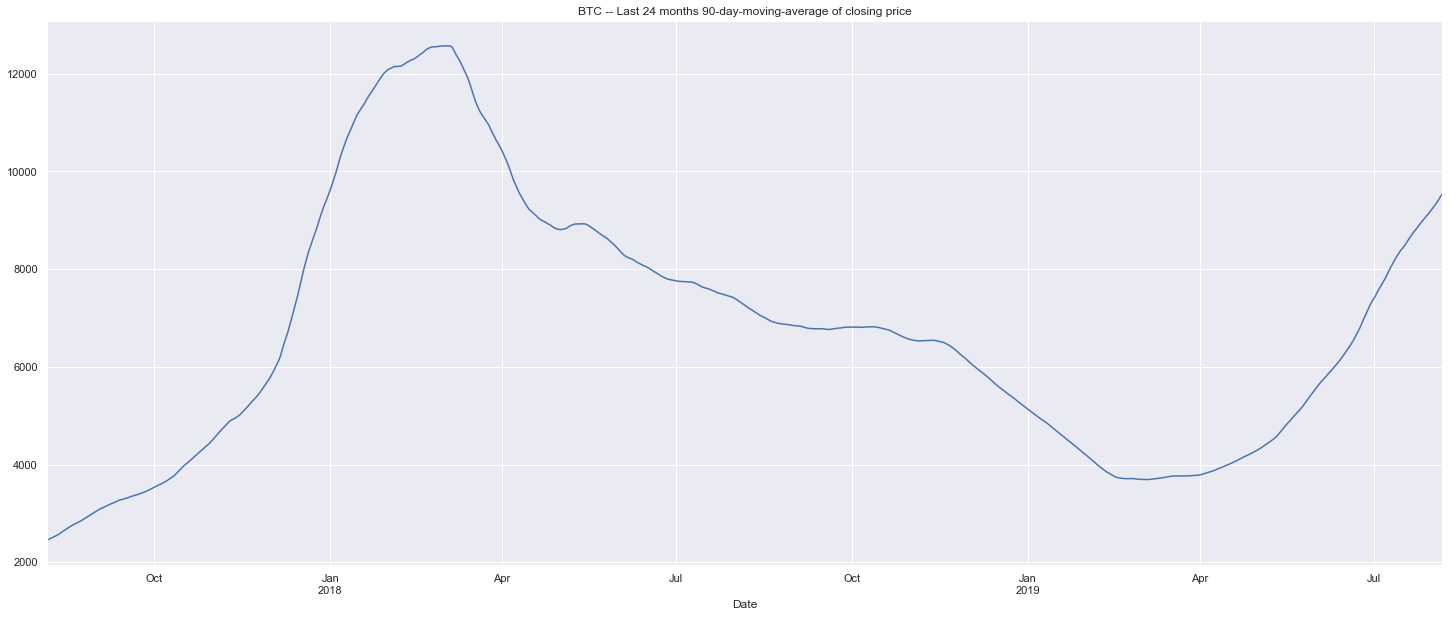

In [117]:
#BTC
#plot recent 24 months of closing price/30days moving average/90days moving average
plt.figure(figsize=[25,10])
BTC['Close'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('BTC -- Last 24 months closing price')
plt.show()

plt.figure(figsize=[25,10])
BTC['movingAverage_30days'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('BTC -- Last 24 months 30-day-moving-average of closing price')
plt.show()

plt.figure(figsize=[25,10])
BTC['movingAverage_90days'].loc['2017-08-06':'2019-08-06'].plot()
plt.title('BTC -- Last 24 months 90-day-moving-average of closing price')
plt.show()

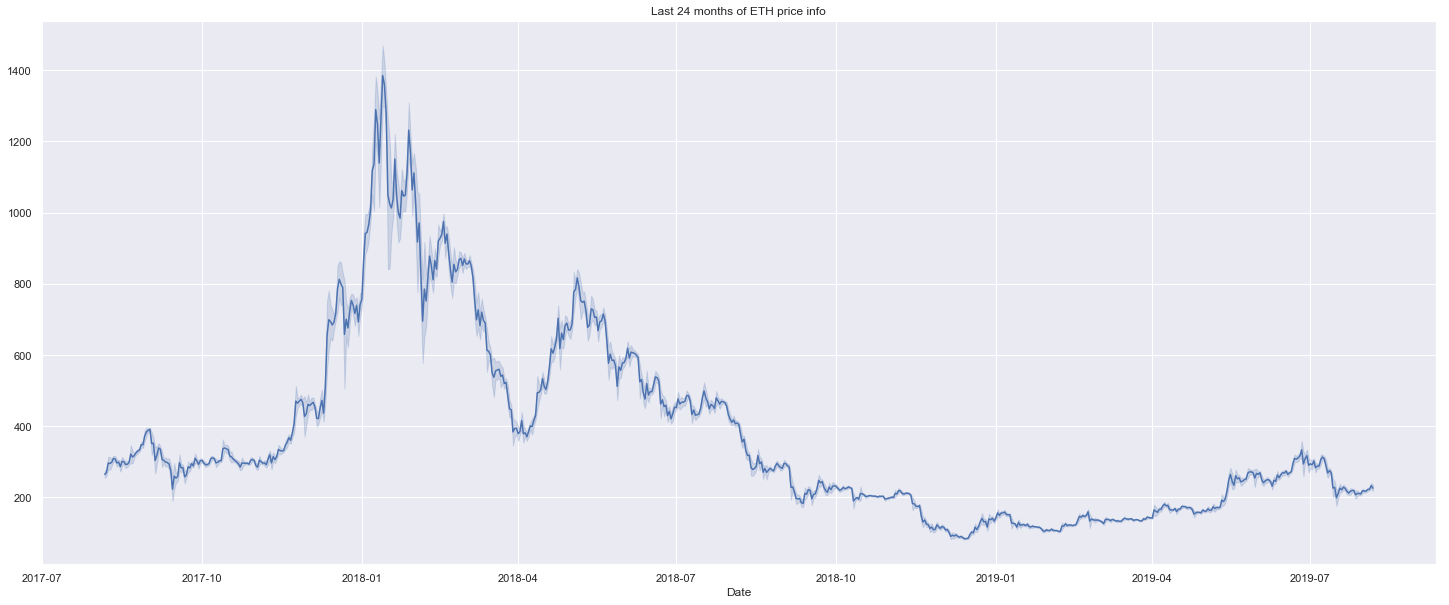

In [118]:
#create a new dataframe and 
#put ETH's high price/low price/closing price of each day in one column
etherprice = ETH.Close.loc['2017-08-06':'2019-08-06'].append(ETH.High.loc['2017-08-06':'2019-08-06'])
etherprice = etherprice.append(ETH.Low.loc['2017-08-06':'2019-08-06'])

#visualize lineplot of the ETH's closing price and 
#use high and low price as error range
plt.figure(figsize=[25,10])
sns.lineplot(x = etherprice.index, y = etherprice.loc[:], ci = 'sd', estimator = 'median', err_style = 'band')
plt.title('Last 24 months of ETH price info')
plt.show()

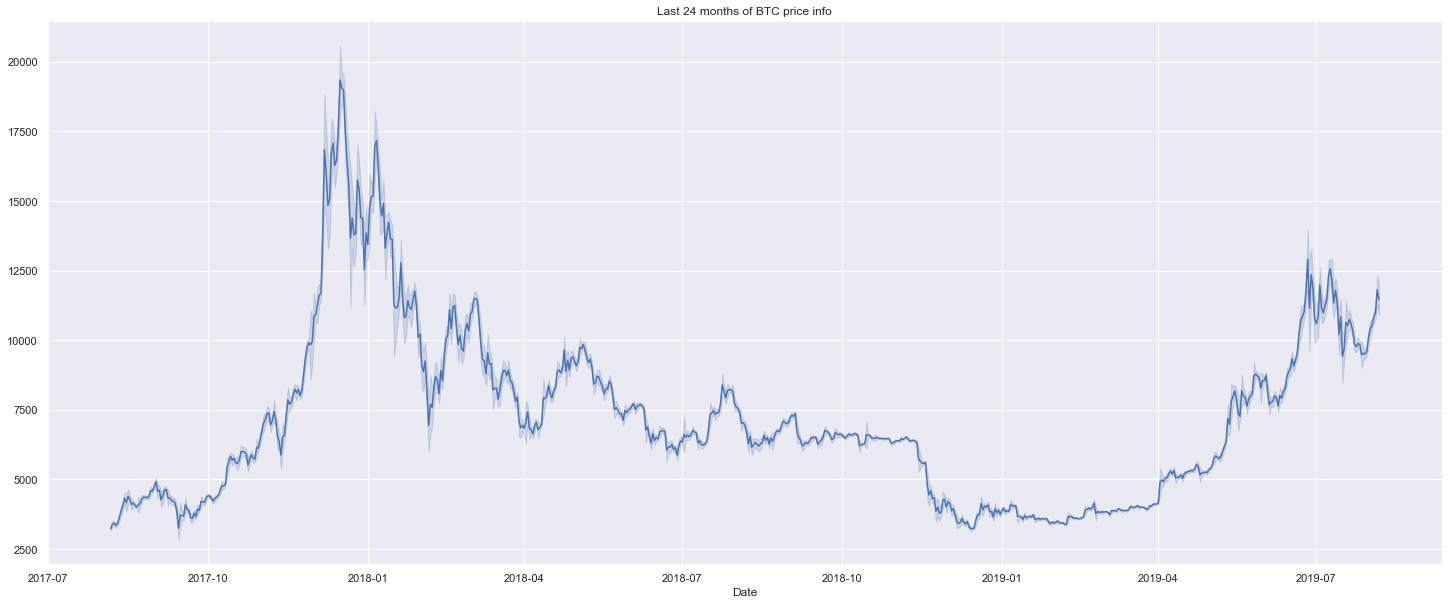

In [119]:
#do the same thing for bitcoin
bitprice = BTC.Close.loc['2017-08-06':'2019-08-06'].append(BTC.High.loc['2017-08-06':'2019-08-06'])
bitprice = bitprice.append(BTC.Low.loc['2017-08-06':'2019-08-06'])

plt.figure(figsize=[25,10])
sns.lineplot(x = bitprice.index, y = bitprice.loc[:], ci = 'sd', estimator = 'median', err_style = 'band')
plt.title('Last 24 months of BTC price info')
plt.show()

In [120]:
#create a new dataframe and 
#put columns of pctChange of two crpytos in the dataframe
priceChange = pd.DataFrame({'BTC': BTC['pctChange'].loc['2017-08-06':'2019-08-06'],
                            'ETH': ETH['pctChange'].loc['2017-08-06':'2019-08-06']})

#reset the datetime index back into the dataframe
#so we can access the data of date 
priceChange.reset_index(inplace = True)

#rearrange the dataframe to satisfy the requirement
#generated a column named 'Currency' with values of 'ETH' and 'BTC'
priceChange = priceChange.melt(id_vars = 'Date', value_vars=['BTC', 'ETH'], var_name='Currency', value_name='Pct')

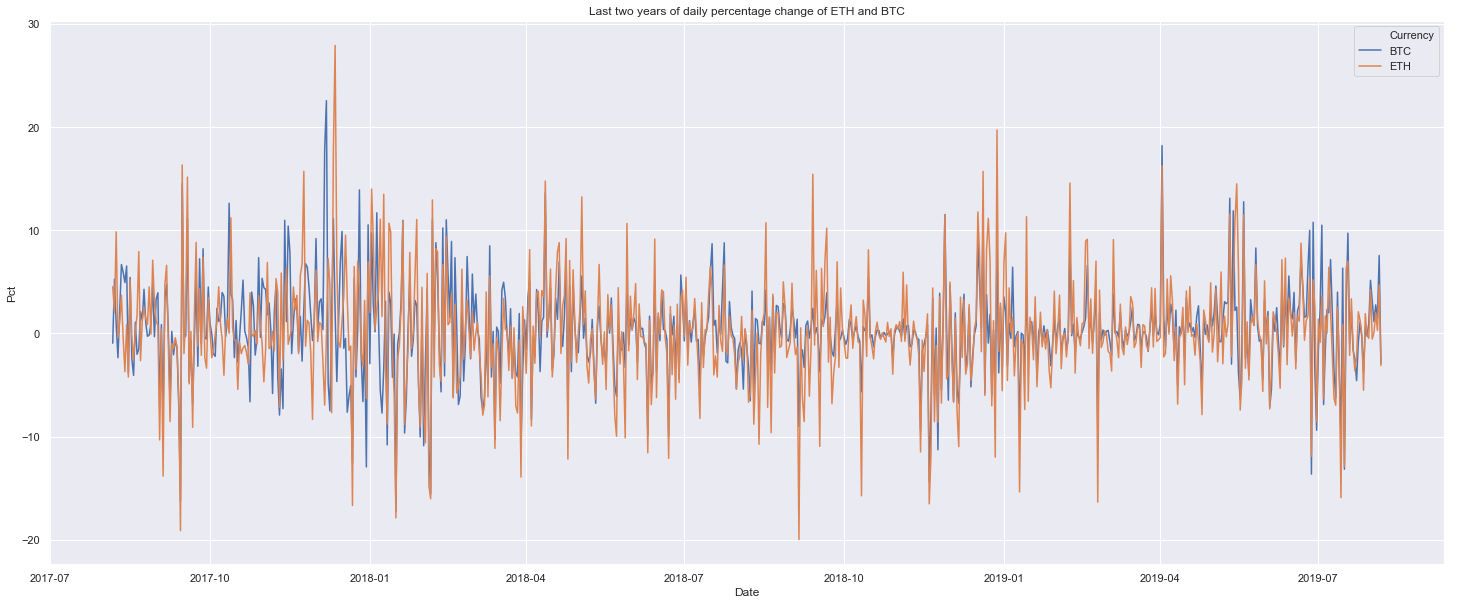

The numeric correlation between them is 0.711552536166636


In [121]:
#plot the dataframe created above
plt.figure(figsize=[25,10])
sns.lineplot(x = 'Date', y = priceChange.Pct, hue = 'Currency', data = priceChange)
plt.title('Last two years of daily percentage change of ETH and BTC')
plt.show()

#the numeric correlation between percentage changes
print('The numeric correlation between them is '
      + str(BTC['pctChange'].loc['2017-08-06':'2019-08-06'].corr(ETH['pctChange'].loc['2017-08-06':'2019-08-06'])))

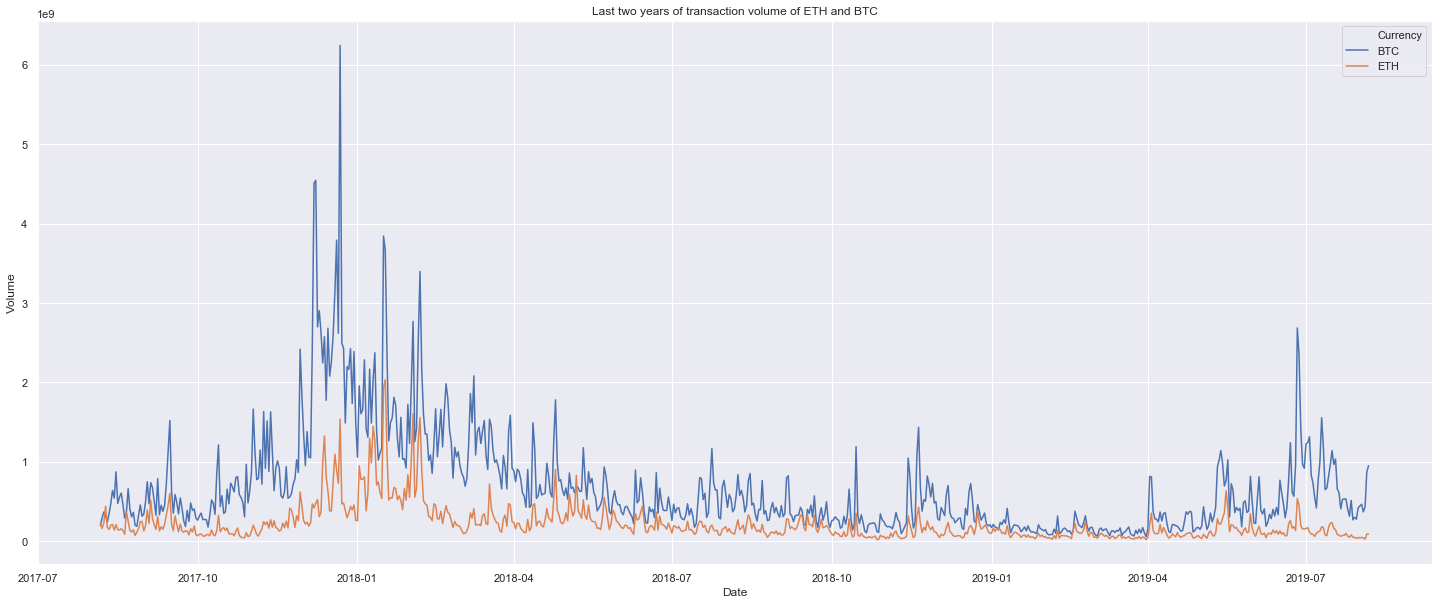

The numeric correlation between them is 0.7856456027979081


In [122]:
#Graph of transaction volume

#create a new dataframe and 
#put columns of volume of two crpytos in the dataframe
volume = pd.DataFrame({'BTC': BTC['Volume'].loc['2017-08-06':'2019-08-06'],
                    'ETH': ETH['Volume'].loc['2017-08-06':'2019-08-06']})

#reset the datetime index back into the dataframe
#so we can access the data of date 
volume.reset_index(inplace = True)

#rearrange the dataframe
#generated a column named 'Currency' with values of 'ETH' and 'BTC'
volume = volume.melt(id_vars = 'Date', value_vars=['BTC', 'ETH'], var_name='Currency', value_name='Volume')

#Graph the dataframe
plt.figure(figsize=[25,10])
sns.lineplot(x = 'Date', y = volume.Volume, hue = 'Currency', data = volume)
plt.title('Last two years of transaction volume of ETH and BTC')
plt.show()

#the numeric correlation between volumes
print('The numeric correlation between them is '
      + str(BTC['Volume'].loc['2017-08-06':'2019-08-06'].corr(ETH['Volume'].loc['2017-08-06':'2019-08-06'])))

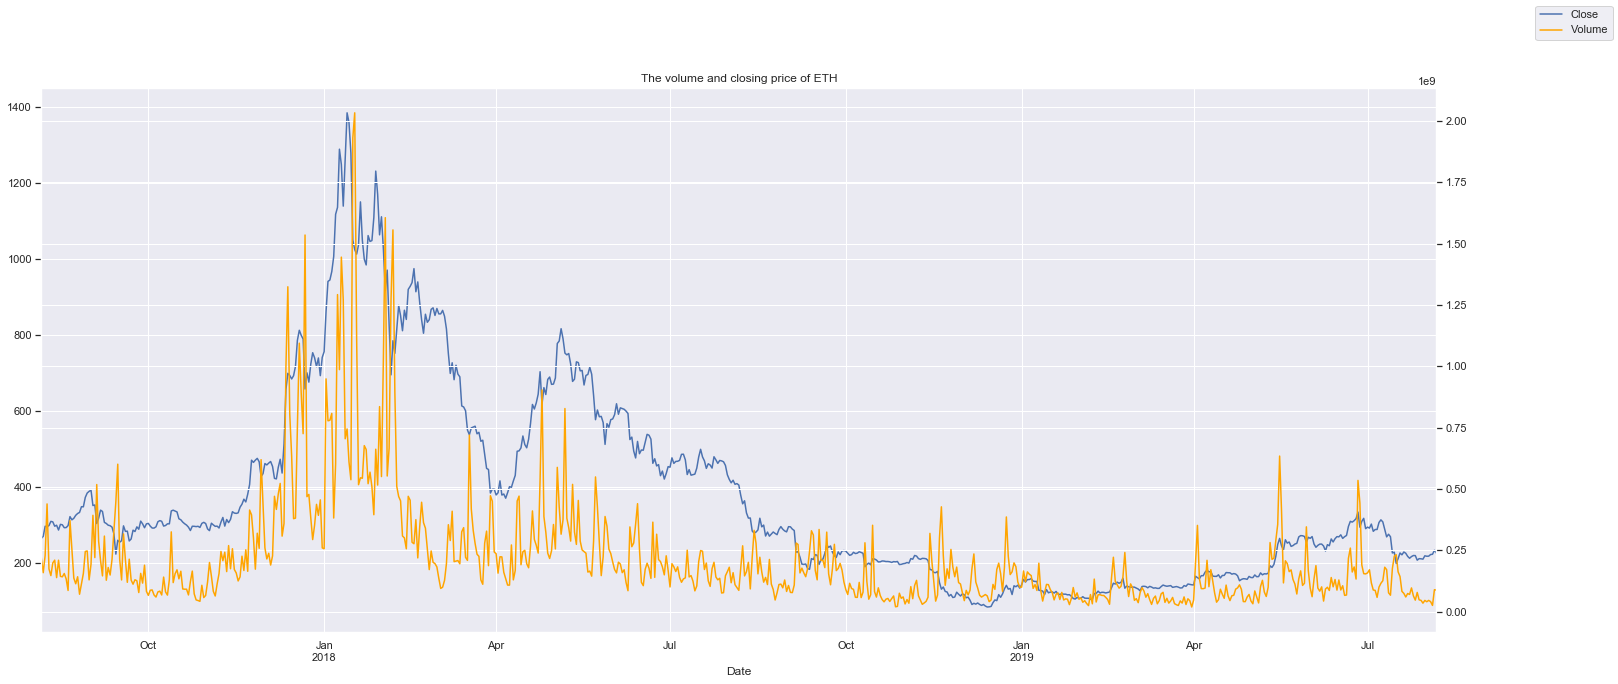

In [123]:
#Graph the volume and closing price of ETH

plt.figure(figsize=[25,10])
ax = ETH['Close'].loc['2017-08-06':'2019-08-06'].plot(legend=False)
ax2 = ax.twinx()
ETH['Volume'].loc['2017-08-06':'2019-08-06'].plot( ax=ax2, legend=False, color = 'orange')
ax.figure.legend()
plt.title('The volume and closing price of ETH')
plt.show()

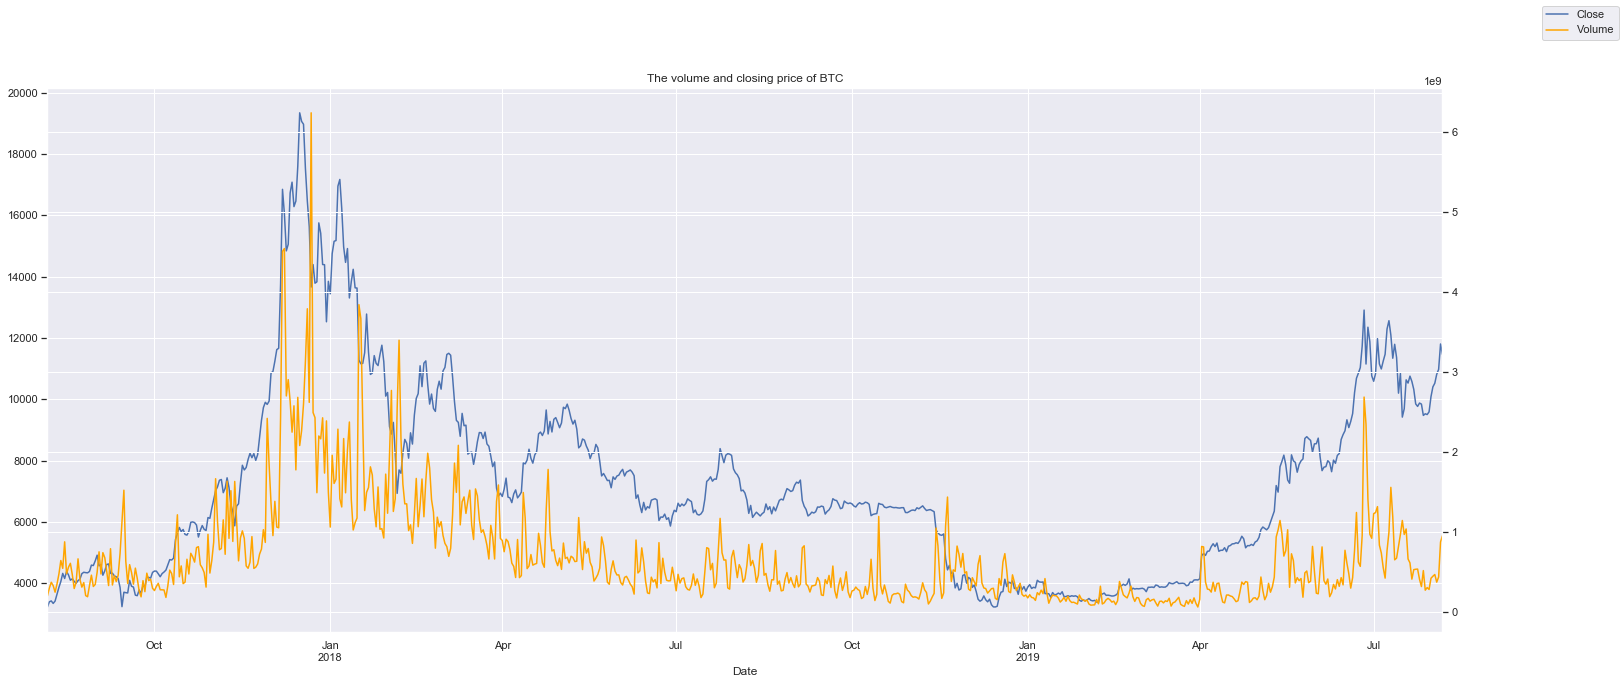

In [124]:
#Graph the volume and closing price of BTC
plt.figure(figsize=[25,10])
ax = BTC['Close'].loc['2017-08-06':'2019-08-06'].plot(legend=False)
ax2 = ax.twinx()
BTC['Volume'].loc['2017-08-06':'2019-08-06'].plot( ax=ax2, legend=False, color = 'orange')
ax.figure.legend()
plt.title('The volume and closing price of BTC')
plt.show()

In [125]:
ethertrans = pd.read_csv("Ether.csv", parse_dates = ['Date'])

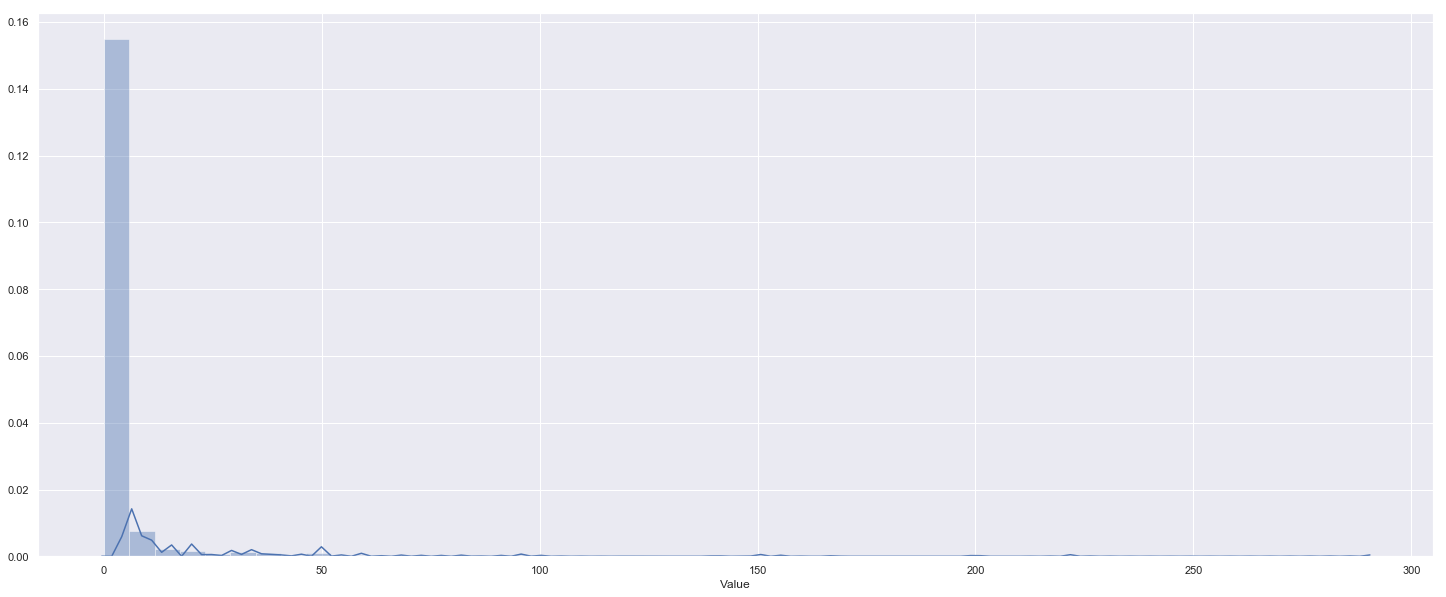

In [126]:
#Histogram of personal transaction sizes
plt.figure(figsize=[25,10])
sns.distplot(ethertrans.Value)
plt.show()

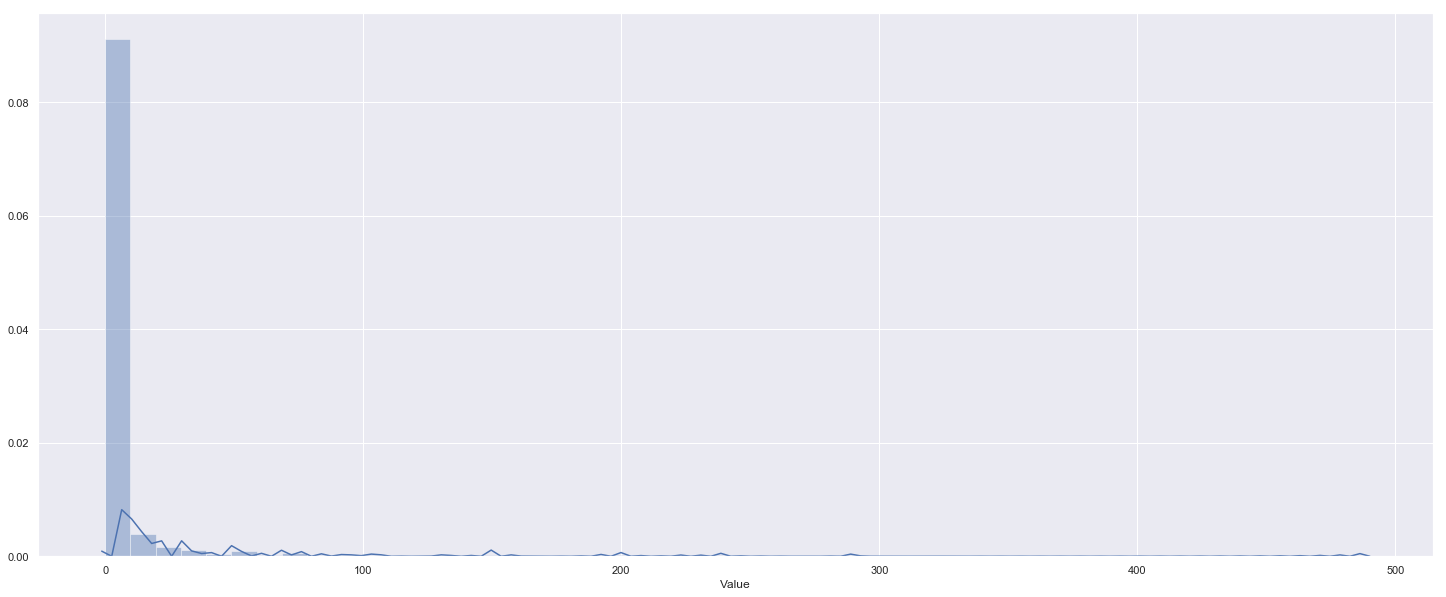

In [127]:
#Histogram of the total SENT transaction volume per address

plt.figure(figsize=[25,10])
sns.distplot(ethertrans.groupby("From").sum().Value)
plt.show()

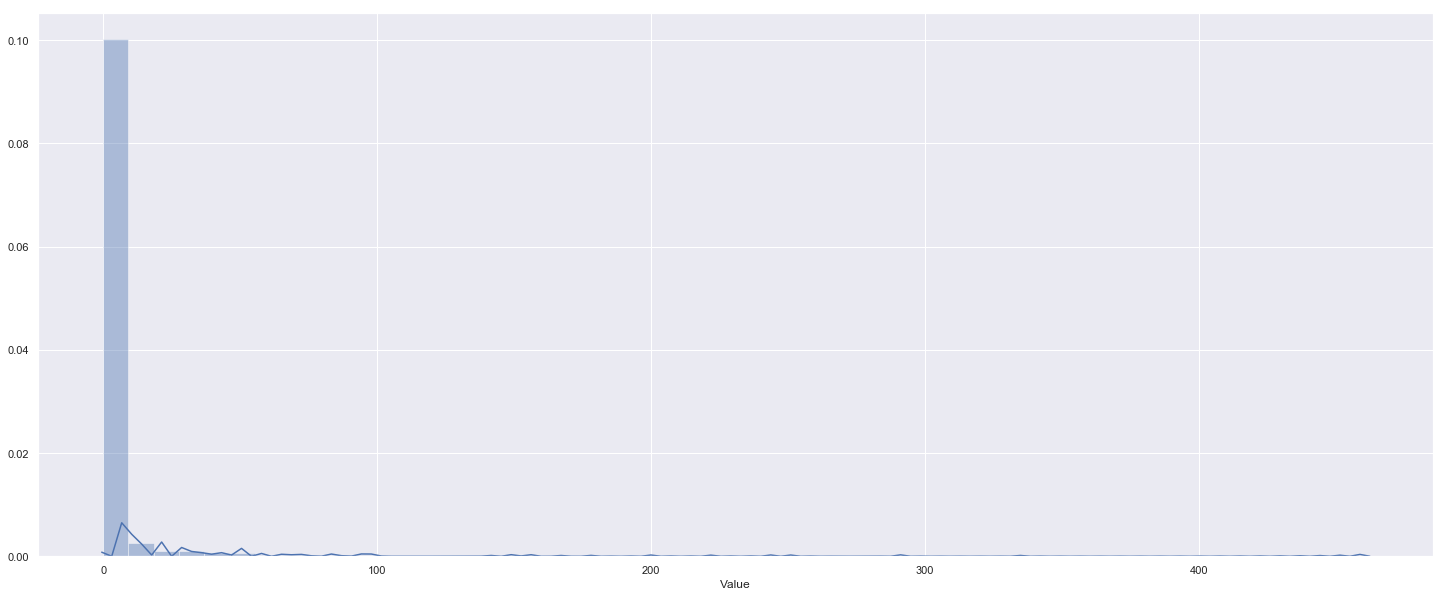

In [128]:
#Histogram of the total RECEIVED transaction volume per address

plt.figure(figsize=[25,10])
sns.distplot(ethertrans.groupby("To").sum().Value)
plt.show()

<Figure size 1800x720 with 0 Axes>

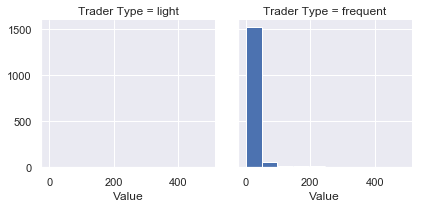

In [129]:
#Create a new dataframe called traders
#for each trader, aggregate the amount of sent and received
traders = ethertrans.groupby("To").sum()
traders = traders.append(ethertrans.groupby("From").sum())

#sort the dataframe
traders = traders.sort_values(by = 'Value')

#get the median of trader's total transaction amount
med = traders.Value.median()

#create a new list and 
#iterate through the dataframe
#if transaction amount of a trader is less than/equal to median, he/she is a light trader
#else, he/she is a frequent trader
traderType = []
for value in traders['Value']:
    if value<=med :
        traderType.append('light')
    else:
        traderType.append('frequent')

#add the list as a new column
traders['Trader Type'] = traderType

#graph the two panel chart (the chart is difficult to be abstracted useful information)
plt.figure(figsize=[25,10])
g = sns.FacetGrid(traders, col="Trader Type")
g.map(plt.hist, "Value");
plt.show()